In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import micrograd.nn as nn 
from micrograd.core import Tensor 
import micrograd.optim as optim

import torch

/home/valle/Projekt/ML/micrograd/micrograd/ops.py:73: RuntimeWarning: invalid value encountered in log
  return gy * b * a**(b-1), gy * a**b * np.log(a)


-5.607751369476318


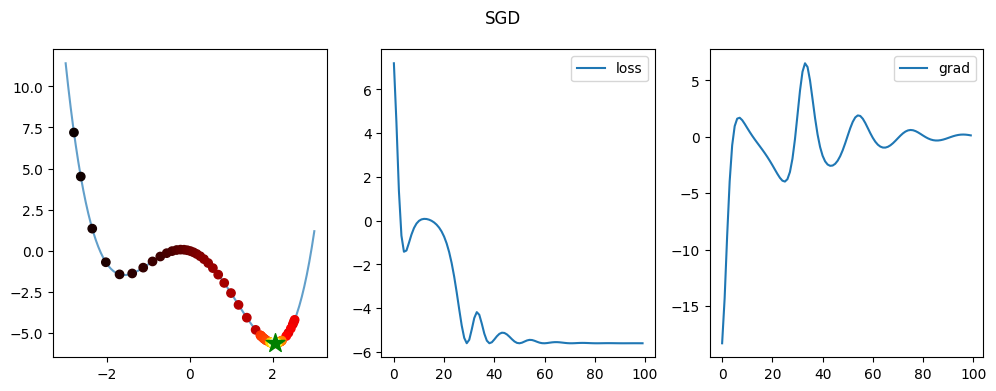

-1.3584507703781128


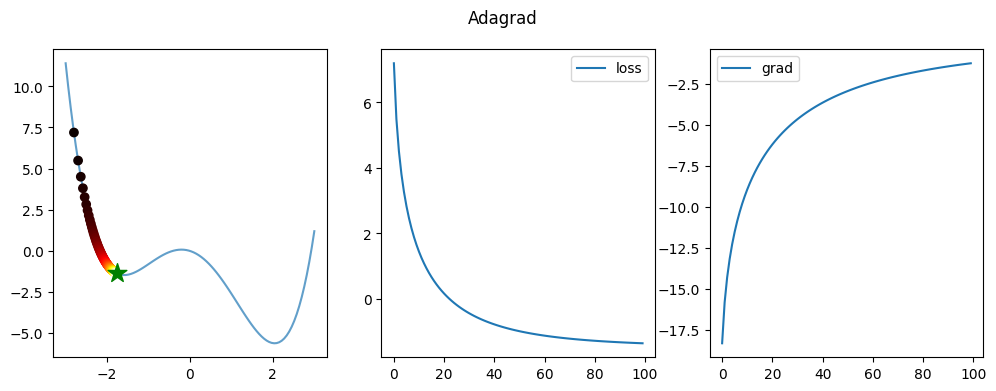

-1.4498895406723022


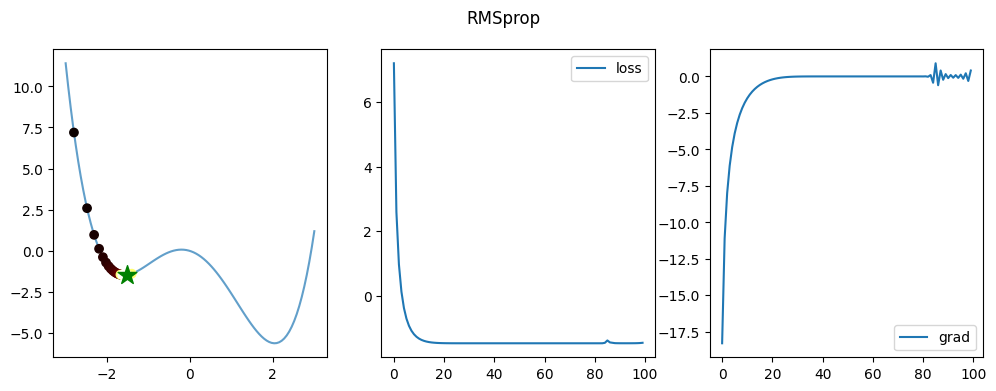

0.11730837821960449


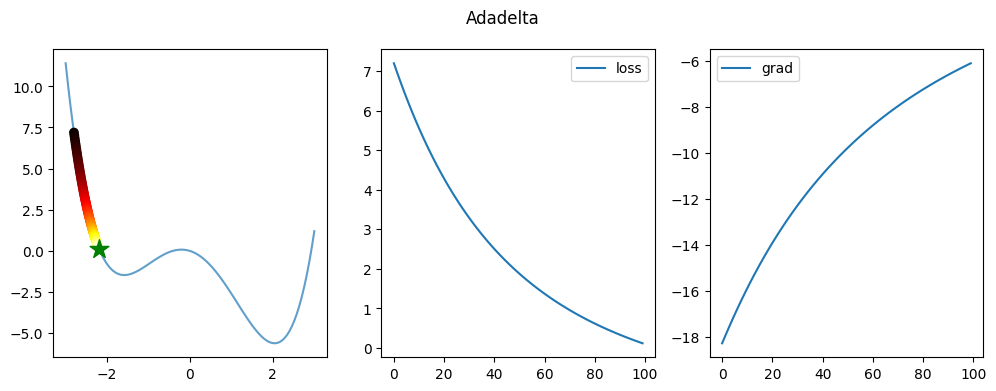

-1.464864730834961


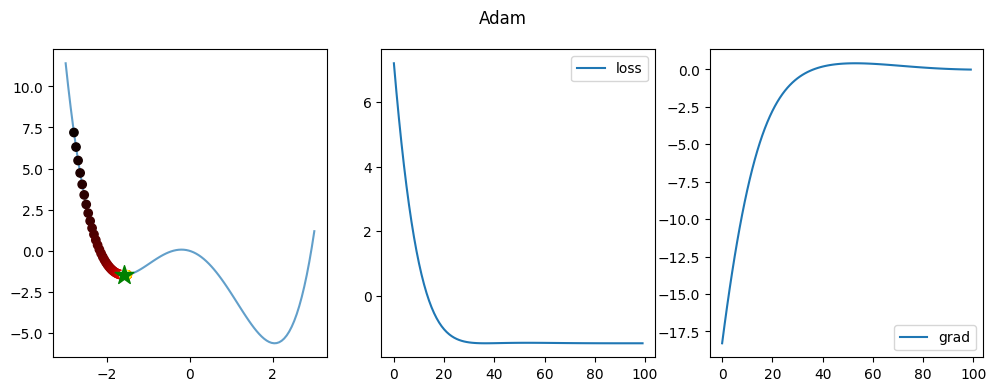

In [19]:
# example from https://optimization.cbe.cornell.edu/index.php?title=Momentum

def f(x):
    return 0.3*x**4 - 0.1*x**3 - 2*x**2 - 0.8*x 

def train(optimizer: optim.Optimizer, w: Tensor, steps: int=100):
    ws, ys, grads = [], [], []
    for i in range(steps):
        optimizer.zero_grad()
        y = f(w)
        ws.append(w.data.item())
        ys.append(y.data.item())
        y.backward()
        grads.append(w.grad.item())
        optimizer.step()

    return ws, ys, grads

def plot(opt, ws, ys, grads):
    print(ys[-1])
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].plot(xs:=np.linspace(-3, 3, 100), f(xs), alpha=0.7)
    ax[0].scatter(ws, ys, c=np.linspace(0,1,len(ws)), cmap='hot', zorder=5)
    ax[0].scatter(ws[-1], ys[-1], c='g', s=200, marker='*', zorder=10)
    ax[1].plot(ys, label="loss"); ax[1].legend()
    ax[2].plot(grads, label="grad"); ax[2].legend()
    fig.suptitle(type(opt).__name__)
    plt.show()

w0 = -2.8

w = Tensor(w0)
opt = optim.SGD([w], lr=1e-2, momentum=0.9, dampening=0.1)
ws, ys, grads = train(opt, w, steps=100)
plot(opt, ws, ys, grads)
    
w = Tensor(w0)
opt = optim.Adagrad([w], lr=0.1, eps=1e-6)
ws, ys, grads = train(opt, w, steps=100)
plot(opt, ws, ys, grads)

w = Tensor(w0)
opt = optim.RMSprop([w], lr=0.1, alpha=0.9, eps=1e-6)
ws, ys, grads = train(opt, w, steps=100)
plot(opt, ws, ys, grads)

w = Tensor(w0)
opt = optim.Adadelta([w], rho=0.99, eps=1e-6)
ws, ys, grads = train(opt, w, steps=100)
plot(opt, ws, ys, grads)

w = Tensor(w0)
opt = optim.Adam([w], lr=5e-2, beta1=0.9, beta2=0.999, eps=1e-6)
ws, ys, grads = train(opt, w, steps=100)
plot(opt, ws, ys, grads)